# Car Price Prediction 

### Reading the Training Dataset

In [312]:
import pandas as pd

data=pd.read_csv('./Datasets/train-data.csv')

In [313]:
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [314]:
#cleaning the dataset
#removing all the units assigned to the values

import re
import numpy as np
def extract_numeric_values(input_string):
    numeric_part = re.sub("[^0-9.]", "", str(input_string))
    if numeric_part == '':
        numeric_part = np.nan
    else:
        numeric_part = float(numeric_part)
    return numeric_part

# Update the 'Mileage' column
data['Mileage'] = data['Mileage'].apply(extract_numeric_values)
data['Engine'] = data['Engine'].apply(extract_numeric_values)
data['Power'] = data['Power'].apply(extract_numeric_values)
data['New_Price']=data['New_Price'].apply(extract_numeric_values)
# Display the updated DataFrame
data.head()


,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [315]:
data.shape[0]

6019

In [316]:
null_values= data.isnull().sum()
print(null_values)

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                 143
Seats                  42
New_Price            5195
Price                   0
dtype: int64


### Dealing with null values

In [317]:
#dropping the index from the dataset

data=data.drop(['Unnamed: 0'],axis=1)

In [318]:
#New_price we give to a new data frame and drop the New_price varaible

new_df=pd.DataFrame()
new_df['New_Price']=data['New_Price']
new_df.head()

data=data.drop('New_Price',axis=1)

In [319]:
#dropping all null values
import numpy as np
def replace_zero_with_mean(data, column_name):
    # Replace 0.0 with NaN
    data[column_name].replace(0.0, np.nan, inplace=True)
    
    # Calculate the mean (ignoring NaN values)
    mean_value = np.nanmean(data[column_name])
    print(f"Mean of {column_name} =", mean_value)
    
    # Fill NaN values with the mean
    data[column_name].fillna(value=mean_value, inplace=True)

# Assuming 'data' is your DataFrame
replace_zero_with_mean(data, 'Mileage')
replace_zero_with_mean(data, 'Engine')
replace_zero_with_mean(data, 'Power')
replace_zero_with_mean(data,'Seats')

null_values= data.isnull().sum()
print(null_values)

Mean of Mileage = 18.342252479408305
Mean of Engine = 1621.276449941501
Mean of Power = 113.25304969366915
Mean of Seats = 5.2796184738955825
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64


### Exploratory Data Analysis

In [340]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_histogram(data, column, title=None):
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}' if title is None else title)
    plt.show()

def plot_countplot(data, column, title=None):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=data)
    plt.title(f'Distribution of {column}' if title is None else title)
    plt.show()

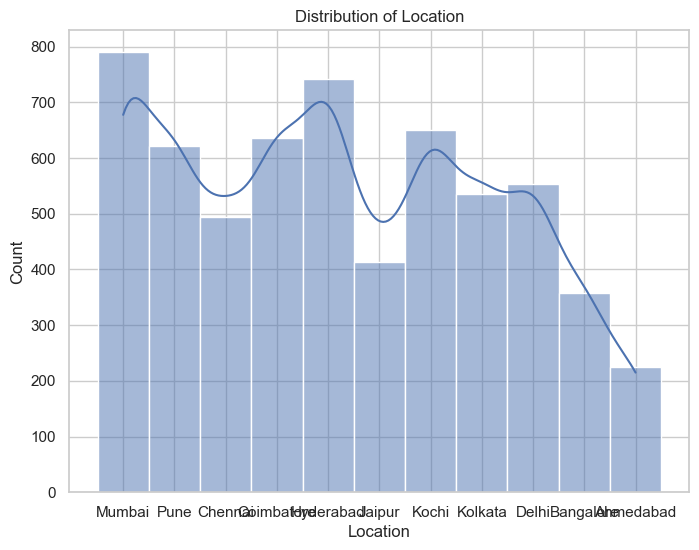

In [326]:
#Location
plot_histogram(data,'Location')

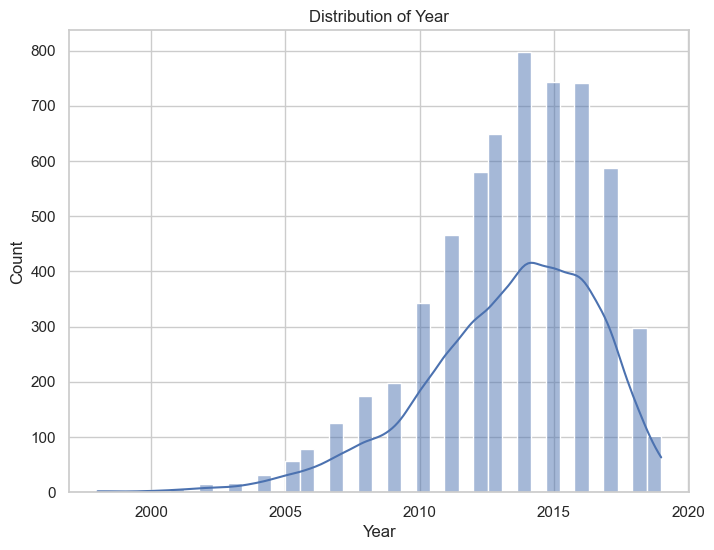

In [327]:
#Year
plot_histogram(data,'Year')

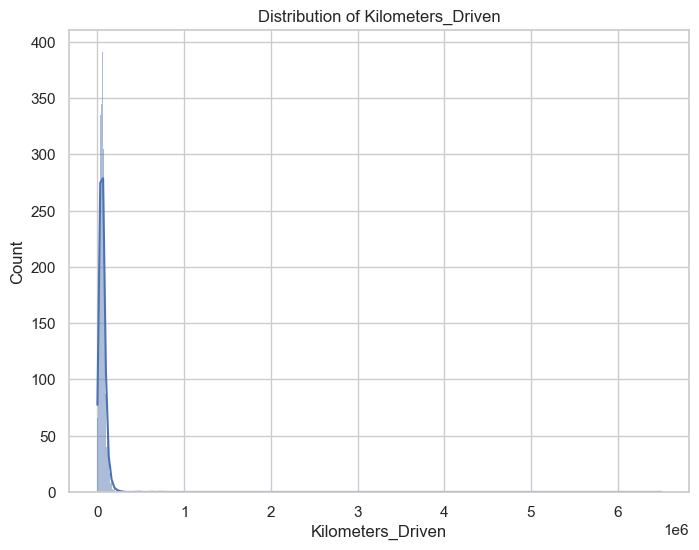

Average kilometers driven: 58738.38029573019


In [329]:
plot_histogram(data,'Kilometers_Driven')

print("Average kilometers driven:",data.Kilometers_Driven.mean())


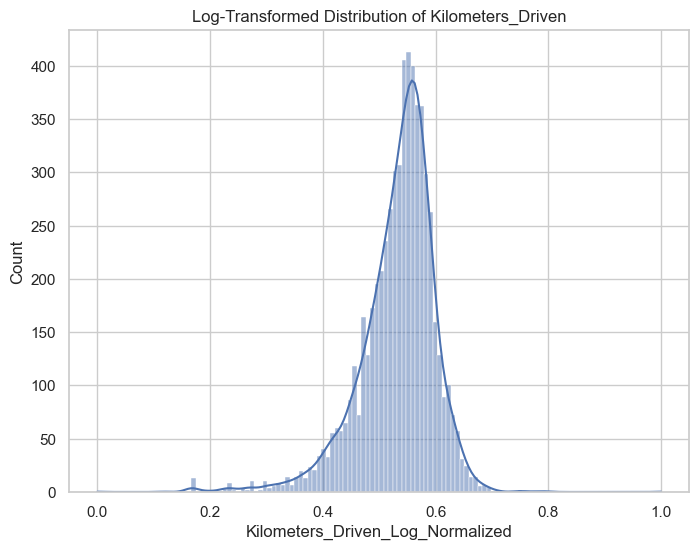

In [330]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['Kilometers_Driven_Log'] = np.log1p(data['Kilometers_Driven'])
data['Kilometers_Driven_Log_Normalized'] = scaler.fit_transform(data[['Kilometers_Driven_Log']])

# Plot the distribution plot after the transformation
plt.figure(figsize=(8, 6))
sns.histplot(data['Kilometers_Driven_Log_Normalized'], kde=True)
plt.title('Log-Transformed Distribution of Kilometers_Driven')
plt.show()


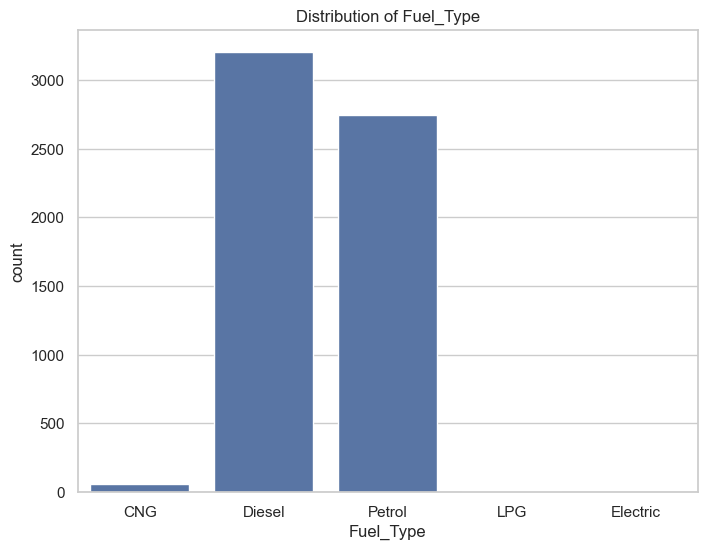

Fuel_Type
Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: count, dtype: int64

In [332]:
plot_countplot(data,'Fuel_Type')
data.Fuel_Type.value_counts()


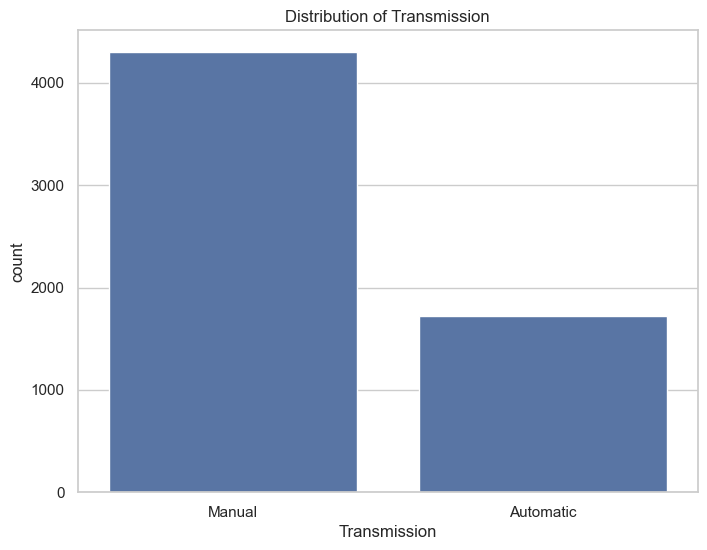

In [333]:
plot_countplot(data,'Transmission')

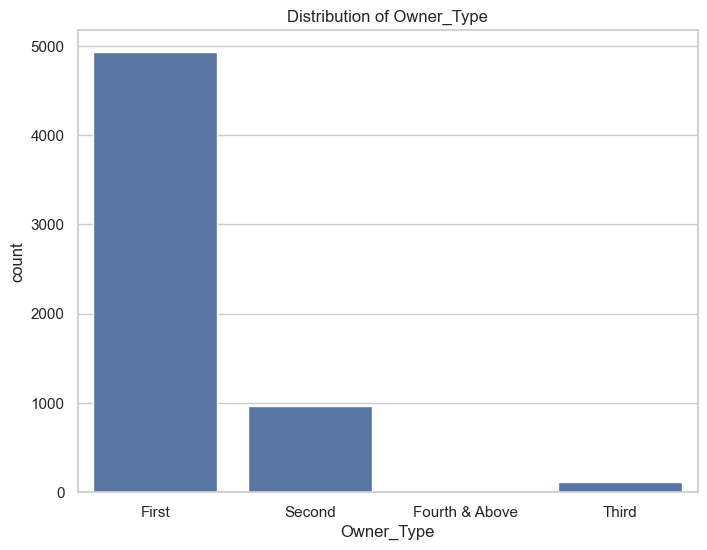

In [336]:
plot_countplot(data,'Owner_Type')

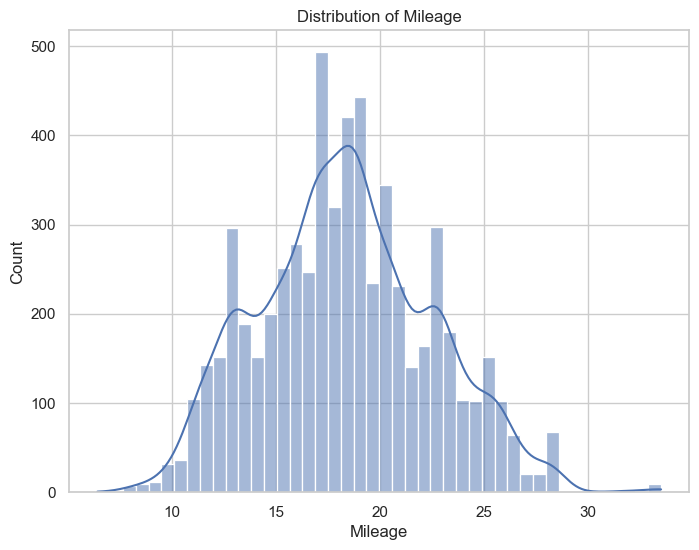

Max Mileage: 33.54


In [337]:
plot_histogram(data,'Mileage')
print("Max Mileage:",data.Mileage.max())

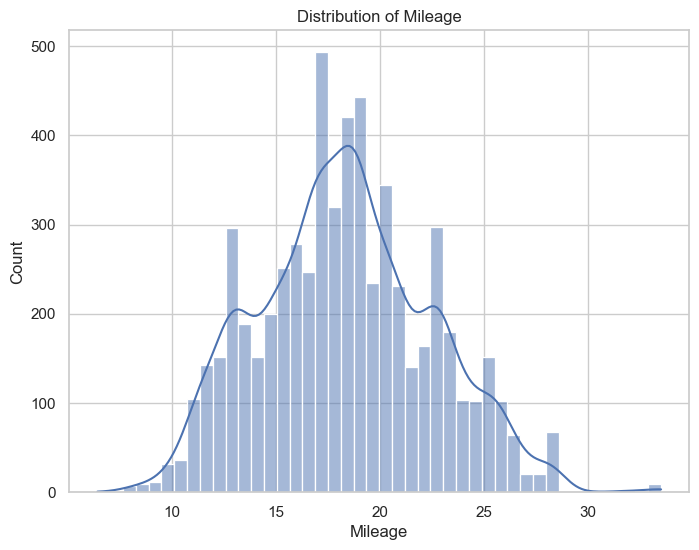

Average Mileage is 18.342252479408305
Range of Mileage is from 6.4 to 33.54


In [347]:
plot_histogram(data,'Mileage')
print("Average Mileage is",data.Mileage.mean())
print("Range of Mileage is from {} to {}".format(data.Mileage.min(),data.Mileage.max()))


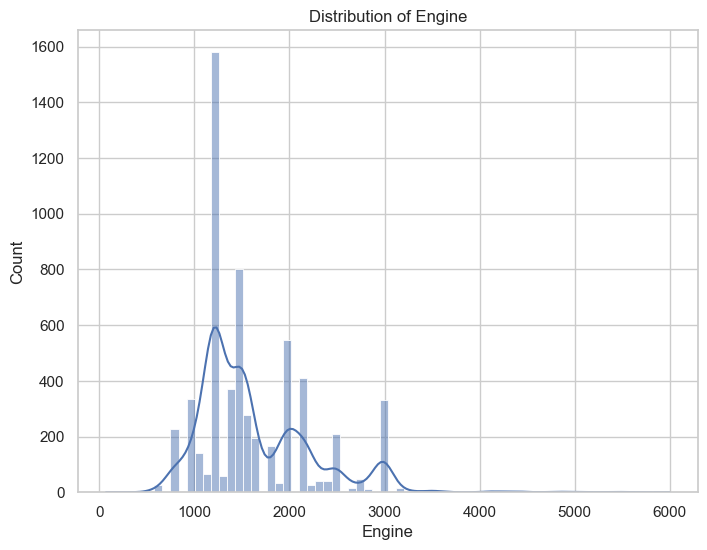

Range of engine volume is from 72.0 to 5998.0


In [345]:
plot_histogram(data,'Engine')
print("Range of engine volume is from {} to {}".format(data.Engine.min(),data.Engine.max()))


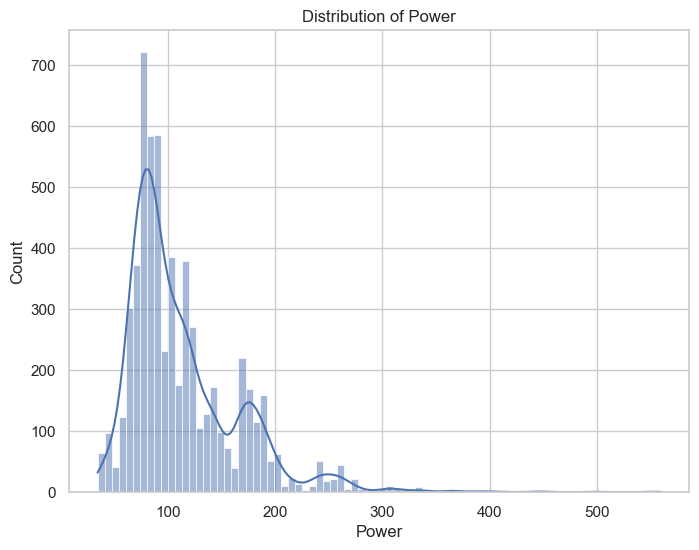

Range of power is from 34.2 to 560.0


In [349]:
plot_histogram(data,'Power')
print("Range of power is from {} to {}".format(data.Power.min(),data.Power.max()))


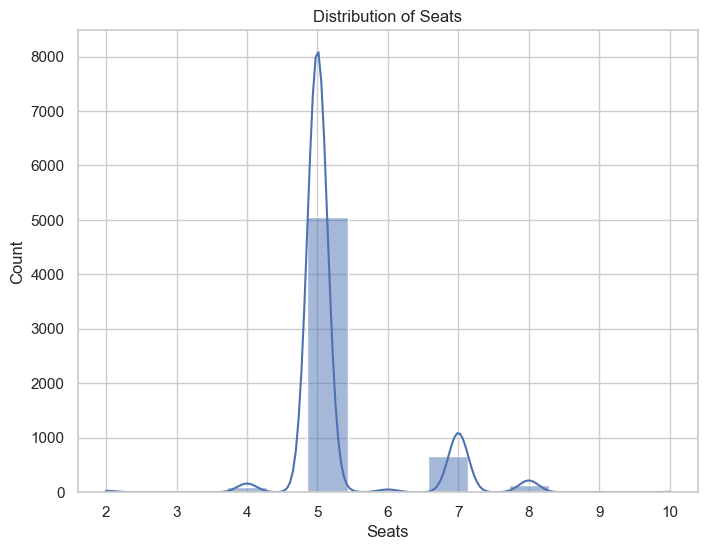

In [352]:
plot_histogram(data,'Seats')

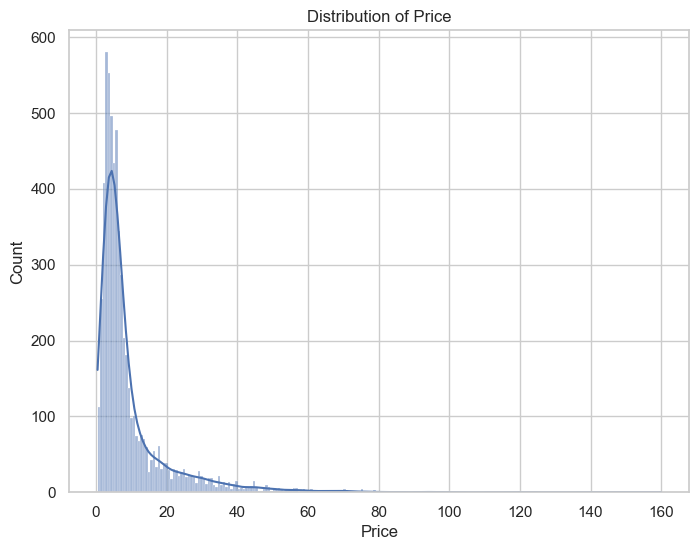

In [358]:
plot_histogram(data,'Price')


#### Comparing Variables with Price(target variable) 

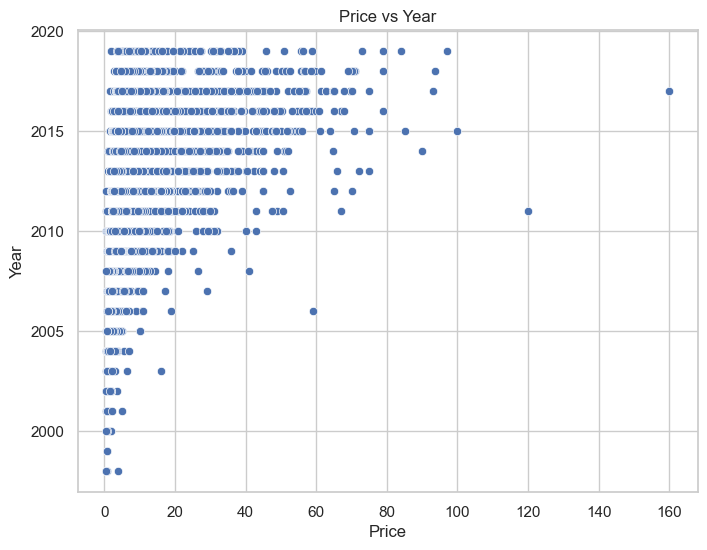

In [416]:
def scatter_price( x_column, title=None):
    plt.figure(figsize=(8, 6))
    
    sns.scatterplot(y=data[x_column], x=data['Price'])
    
    plt.title("Price vs "+x_column)
    plt.xlabel("Price")
    plt.ylabel(x_column)
    plt.show()

def bar_price( x_column, title=None):
    plt.figure(figsize=(8, 6))
    
    sns.barplot(y=data[x_column], x=data['Price'])
    
    plt.title("Price vs "+x_column)
    plt.xlabel("Price")
    plt.ylabel(x_column)
    plt.show()
scatter_price('Year','Price')

##### Price and Year have a linear relationship

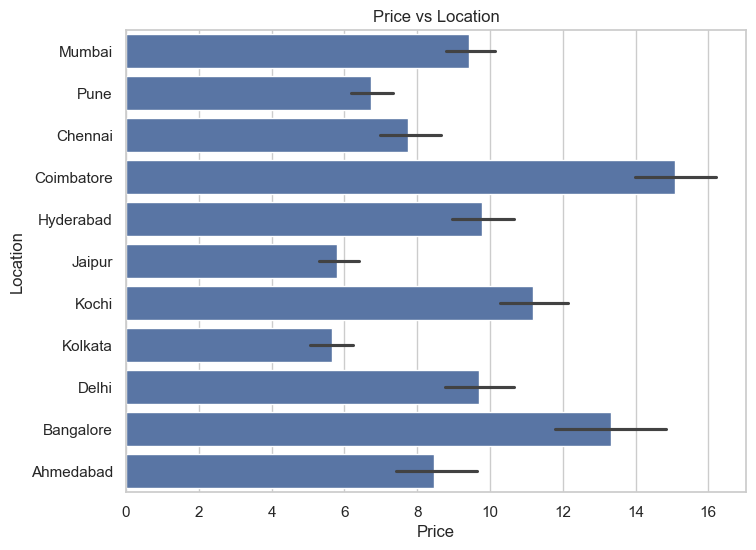

In [417]:
bar_price('Location')

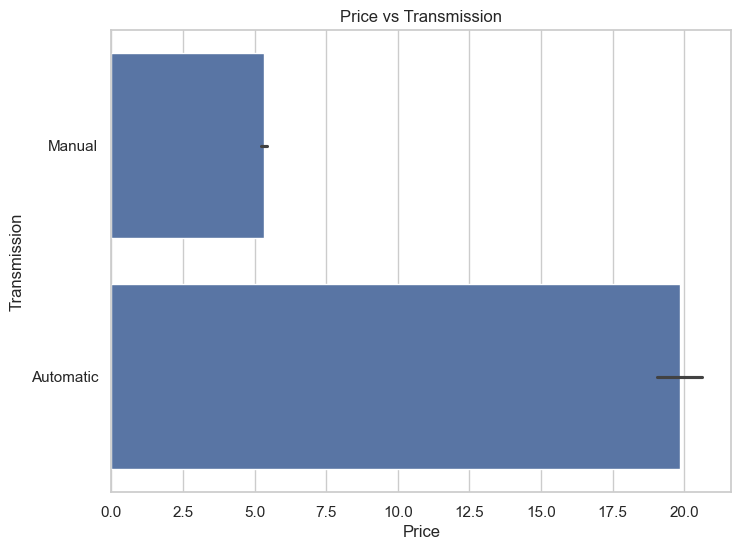

In [418]:
bar_price('Transmission')

#### Automatic tramission type of cars have higher price

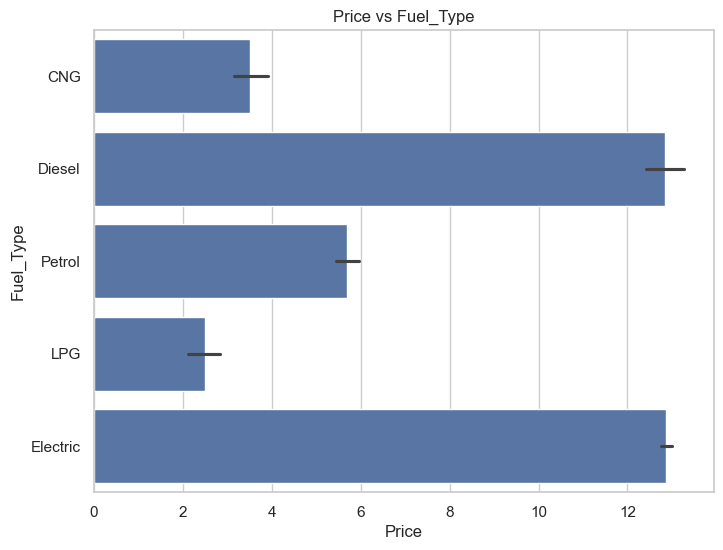

In [419]:
bar_price('Fuel_Type')

#### Diesel and Electric cars are the most expensive

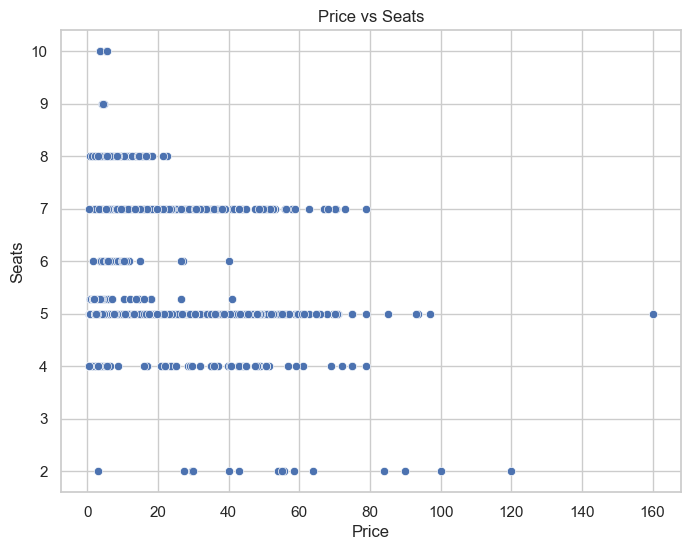

In [420]:
scatter_price('Seats')

#### Seats and Price do not have a linear relationship

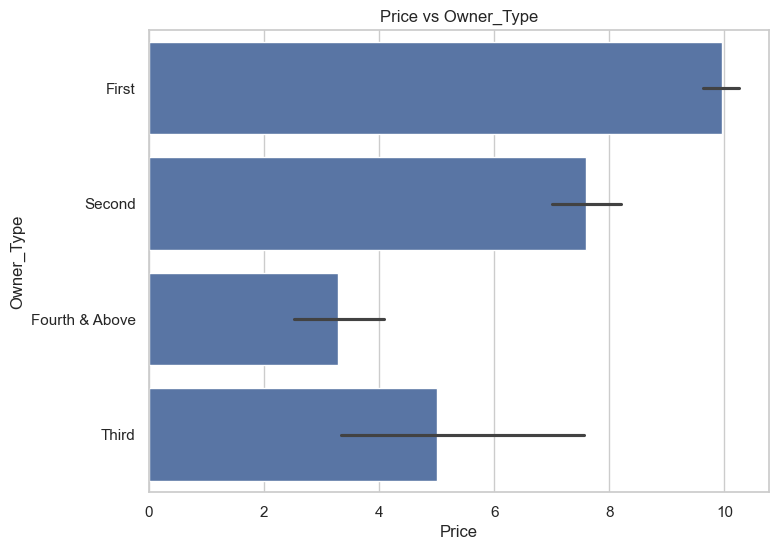

In [421]:
bar_price('Owner_Type')

#### First owned cars are the most expensive

In [422]:
data['Brand'] = data.Name.str.split().str.get(0)
data.head()


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Kilometers_Driven_Log,Kilometers_Driven_Log_Normalized,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,11.184435,0.572775,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,10.621352,0.519350,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,10.736418,0.530268,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,11.373675,0.590729,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,10.613271,0.518584,Audi


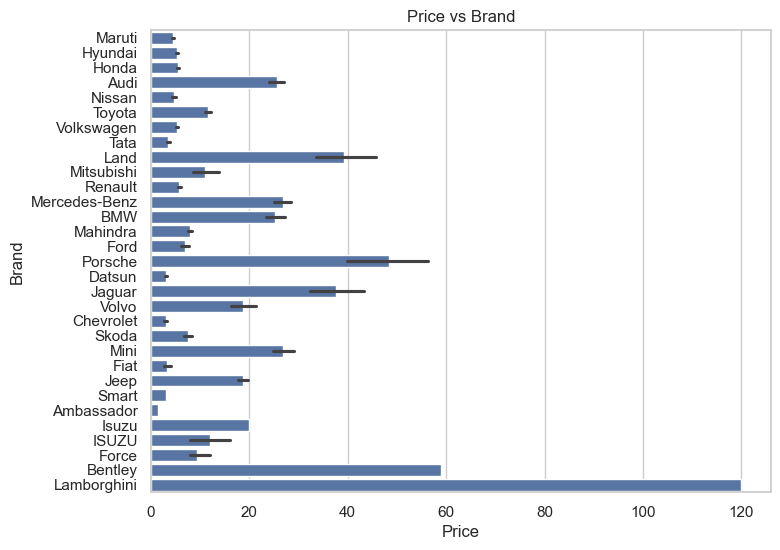

In [423]:
bar_price('Brand')

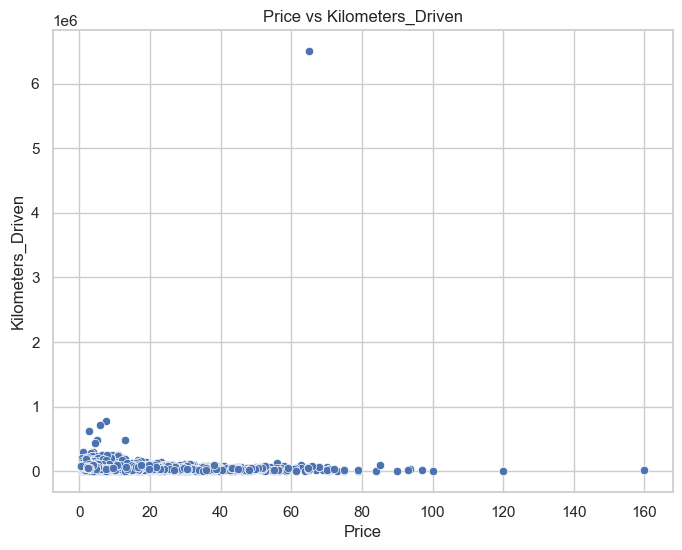

In [424]:
scatter_price('Kilometers_Driven')

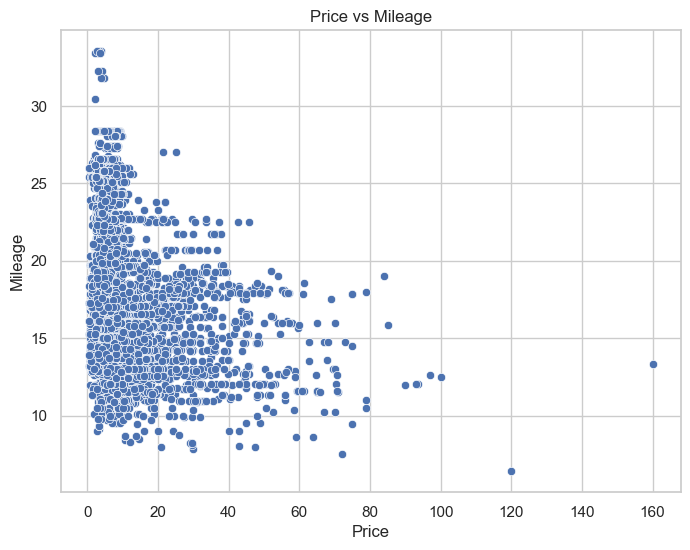

In [425]:
scatter_price('Mileage')

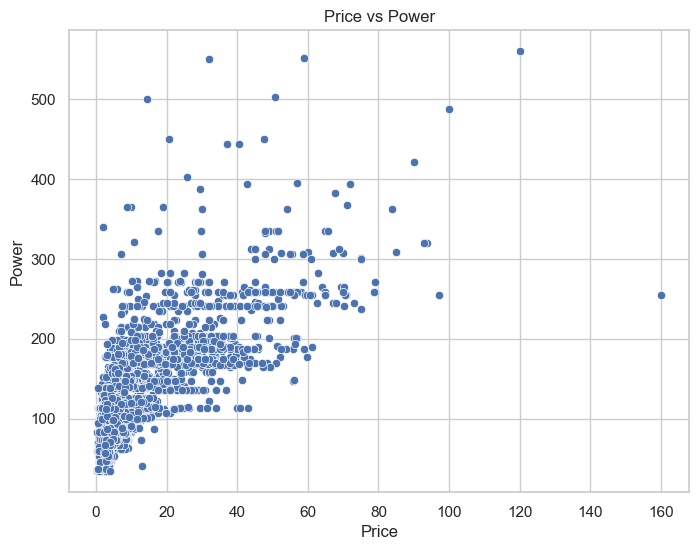

In [426]:
scatter_price('Power')

#### Power and Mileage seems to have linear relationship

In [275]:
data=data.drop(['Name'],axis=1)

In [276]:
#fixing the datatypes
data.dtypes

Location                             object
Year                                  int64
Kilometers_Driven                     int64
Fuel_Type                            object
Transmission                         object
Owner_Type                           object
Mileage                             float64
Engine                              float64
Power                               float64
Seats                               float64
Price                               float64
Kilometers_Driven_Log               float64
Kilometers_Driven_Log_Normalized    float64
dtype: object

In [277]:
for column in data.columns:
    unique_values_count = data[column].nunique()
    print(f"Number of unique values in '{column}': {unique_values_count}")

Number of unique values in 'Location': 11
Number of unique values in 'Year': 22
Number of unique values in 'Kilometers_Driven': 3038
Number of unique values in 'Fuel_Type': 4
Number of unique values in 'Transmission': 2
Number of unique values in 'Owner_Type': 4
Number of unique values in 'Mileage': 429
Number of unique values in 'Engine': 139
Number of unique values in 'Power': 368
Number of unique values in 'Seats': 8
Number of unique values in 'Price': 1364
Number of unique values in 'Kilometers_Driven_Log': 3038
Number of unique values in 'Kilometers_Driven_Log_Normalized': 3038


In [278]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
data['Location']=le.fit_transform(data['Location'])
# Assuming 'data' is your DataFrame
owner_type_dummies = pd.get_dummies(data['Owner_Type'], prefix='Owner_Type')

# Concatenate the dummy columns to the original DataFrame
data = pd.concat([data, owner_type_dummies], axis=1)

# Drop the original 'Owner_Type' column
data = data.drop('Owner_Type', axis=1)

data['Fuel_Type']=le.fit_transform(data['Fuel_Type'])
data['Transmission']=le.fit_transform(data['Transmission'])

In [279]:
data=data.drop(['Kilometers_Driven'],axis=1)
data.head()

,Location,Year,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,Price,Kilometers_Driven_Log,Kilometers_Driven_Log_Normalized,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,9,2010,0,1,26.60,998.0,58.16,5.0,1.75,11.184435,0.572775,True,False,False,False
1,10,2015,1,1,19.67,1582.0,126.20,5.0,12.50,10.621352,0.519350,True,False,False,False
2,2,2011,3,1,18.20,1199.0,88.70,5.0,4.50,10.736418,0.530268,True,False,False,False
3,2,2012,1,1,20.77,1248.0,88.76,7.0,6.00,11.373675,0.590729,True,False,False,False
4,3,2013,1,0,15.20,1968.0,140.80,5.0,17.74,10.613271,0.518584,False,False,True,False


In [280]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming 'data' is your DataFrame with features and target
# X represents features, y represents target variable

X=data.drop(['Price'],axis=1)
y=data['Price']
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R-squared (R2): {r2:.4f}')

# Optionally, you can print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)



Mean Squared Error (MSE): 33.6072
Root Mean Squared Error (RMSE): 5.7972
R-squared (R2): 0.6797
Coefficients: [-2.68008314e-01  8.52419769e-01 -1.68940994e+00 -2.33488848e+00
 -2.43667701e-01  8.00911159e-04  1.24365890e-01 -1.08024935e+00
 -1.80311133e+00 -1.71076129e-01 -2.71610512e-01  2.98318573e-02
 -6.35959079e-01  8.77737734e-01]
Intercept: -1685.7649339329364
